In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load IMDB Data Set
df=pd.read_csv("/content/IMDb Top 1000 Dataset Final.csv")
print(df)

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A      142   
1               The Godfather          1972           A      175   
2             The Dark Knight          2008          UA      152   
3      The Godfather: Part II          1974           A      202   
4                12 Angry Men          1957           U       96   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A      115   
996                     Giant          1956           G      201   
997     From Here to Eternity          1953      Passed      118   
998                  Lifeboat          1944         NaN       97   
999              The 39 Steps          1935         NaN       86   

                        Genre  IMDB_Rating  \
0                       Drama          9.3   
1                Crime, Drama          9.2   
2        Action, Crime, Drama          9.0   

In [4]:
# Q-1. What is the size of the dataset? How many movies are included?
Number = df.shape[0]
print("Number of Movies:", Number)

Number of Movies: 1000


In [5]:
# Q-2. What are the features (columns) present in the dataset? What does each feature represent?
Features= df.columns
print("Features in Dataset:\n", Features)

Features in Dataset:
 Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [6]:
# Q-3. Are there any missing values in the dataset? If so, how should they be handled?
Missing_Values=df.isnull().sum()
print("Missing Values:\n", Missing_Values)

Missing Values:
 Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       142
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


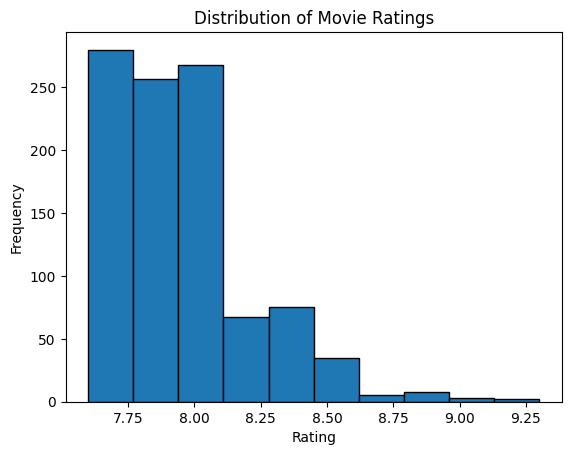

In [7]:
# Q-4. What is the distribution of movie ratings? Are they skewed towards positive or negative ratings?
plt.hist(df['IMDB_Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

In [8]:
# Another Method to find Skewness
df['IMDB_Rating'].skew()

1.016964453611272

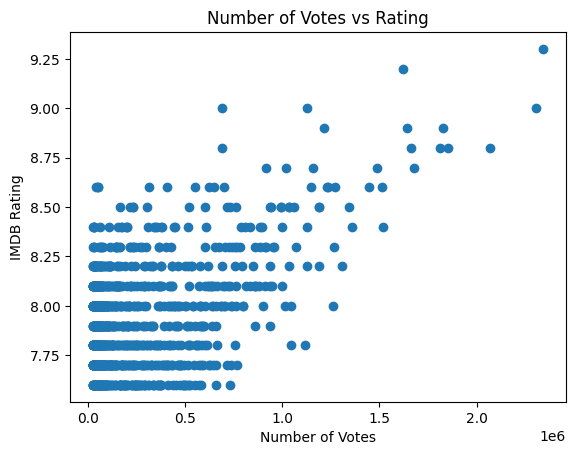

In [9]:
# Q-5. Is there a relationship between movie ratings and the number of votes or reviews?
plt.scatter(df['No_of_Votes'], df['IMDB_Rating'])
plt.xlabel('Number of Votes')
plt.ylabel('IMDB Rating')
plt.title('Number of Votes vs Rating')
plt.show()

In [10]:
# Another Method for Q-5
df.groupby('No_of_Votes')['IMDB_Rating'].value_counts()

No_of_Votes  IMDB_Rating
25088        8.1            1
25198        7.7            1
25229        7.8            1
25312        7.8            1
25344        7.8            1
                           ..
1826188      8.9            1
1854740      8.8            1
2067042      8.8            1
2303232      9.0            1
2343110      9.3            1
Name: IMDB_Rating, Length: 1000, dtype: int64

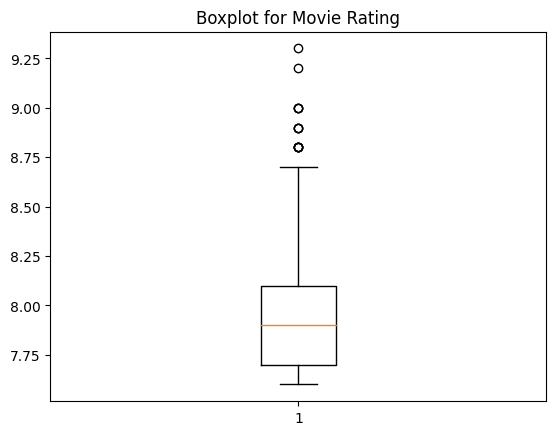

In [11]:
# Q-6. Are there any outliers in the movie ratings or other numerical features? If so, how should they be treated?
plt.boxplot(df['IMDB_Rating'])
plt.title('Boxplot for Movie Rating')
plt.show()

In [12]:
# Q-7. What are the most common genres among the movies in the dataset?
Common_Genre = df['Genre'].value_counts()
print("Most Common Genre:\n", Common_Genre.head(10))

Most Common Genre:
 Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: Genre, dtype: int64


In [13]:
# Q-8. How does the distribution of movie genres affect the ratings?
Average_Rating = df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
print("Average Rating by Genre:\n", Average_Rating)

Average Rating by Genre:
 Genre
Animation, Drama, War         8.50
Drama, Musical                8.40
Action, Sci-Fi                8.40
Drama, Mystery, War           8.35
Western                       8.35
                              ... 
Adventure, Comedy, War        7.60
Animation, Comedy, Crime      7.60
Action, Adventure, Family     7.60
Animation, Drama, Romance     7.60
Action, Adventure, Mystery    7.60
Name: IMDB_Rating, Length: 202, dtype: float64


In [14]:
# Q-09. What are the top-rated movies in the dataset? What are their common characteristics?
Top_Movies = df.nlargest(10, 'IMDB_Rating')
print("Top 10 Movies:\n")
print(Top_Movies[['Series_Title', 'Genre', 'IMDB_Rating', 'No_of_Votes']])

Top 10 Movies:

                                    Series_Title                      Genre  \
0                       The Shawshank Redemption                      Drama   
1                                  The Godfather               Crime, Drama   
2                                The Dark Knight       Action, Crime, Drama   
3                         The Godfather: Part II               Crime, Drama   
4                                   12 Angry Men               Crime, Drama   
5  The Lord of the Rings: The Return of the King   Action, Adventure, Drama   
6                                   Pulp Fiction               Crime, Drama   
7                               Schindler's List  Biography, Drama, History   
8                                      Inception  Action, Adventure, Sci-Fi   
9                                     Fight Club                      Drama   

   IMDB_Rating  No_of_Votes  
0          9.3      2343110  
1          9.2      1620367  
2          9.0      2303

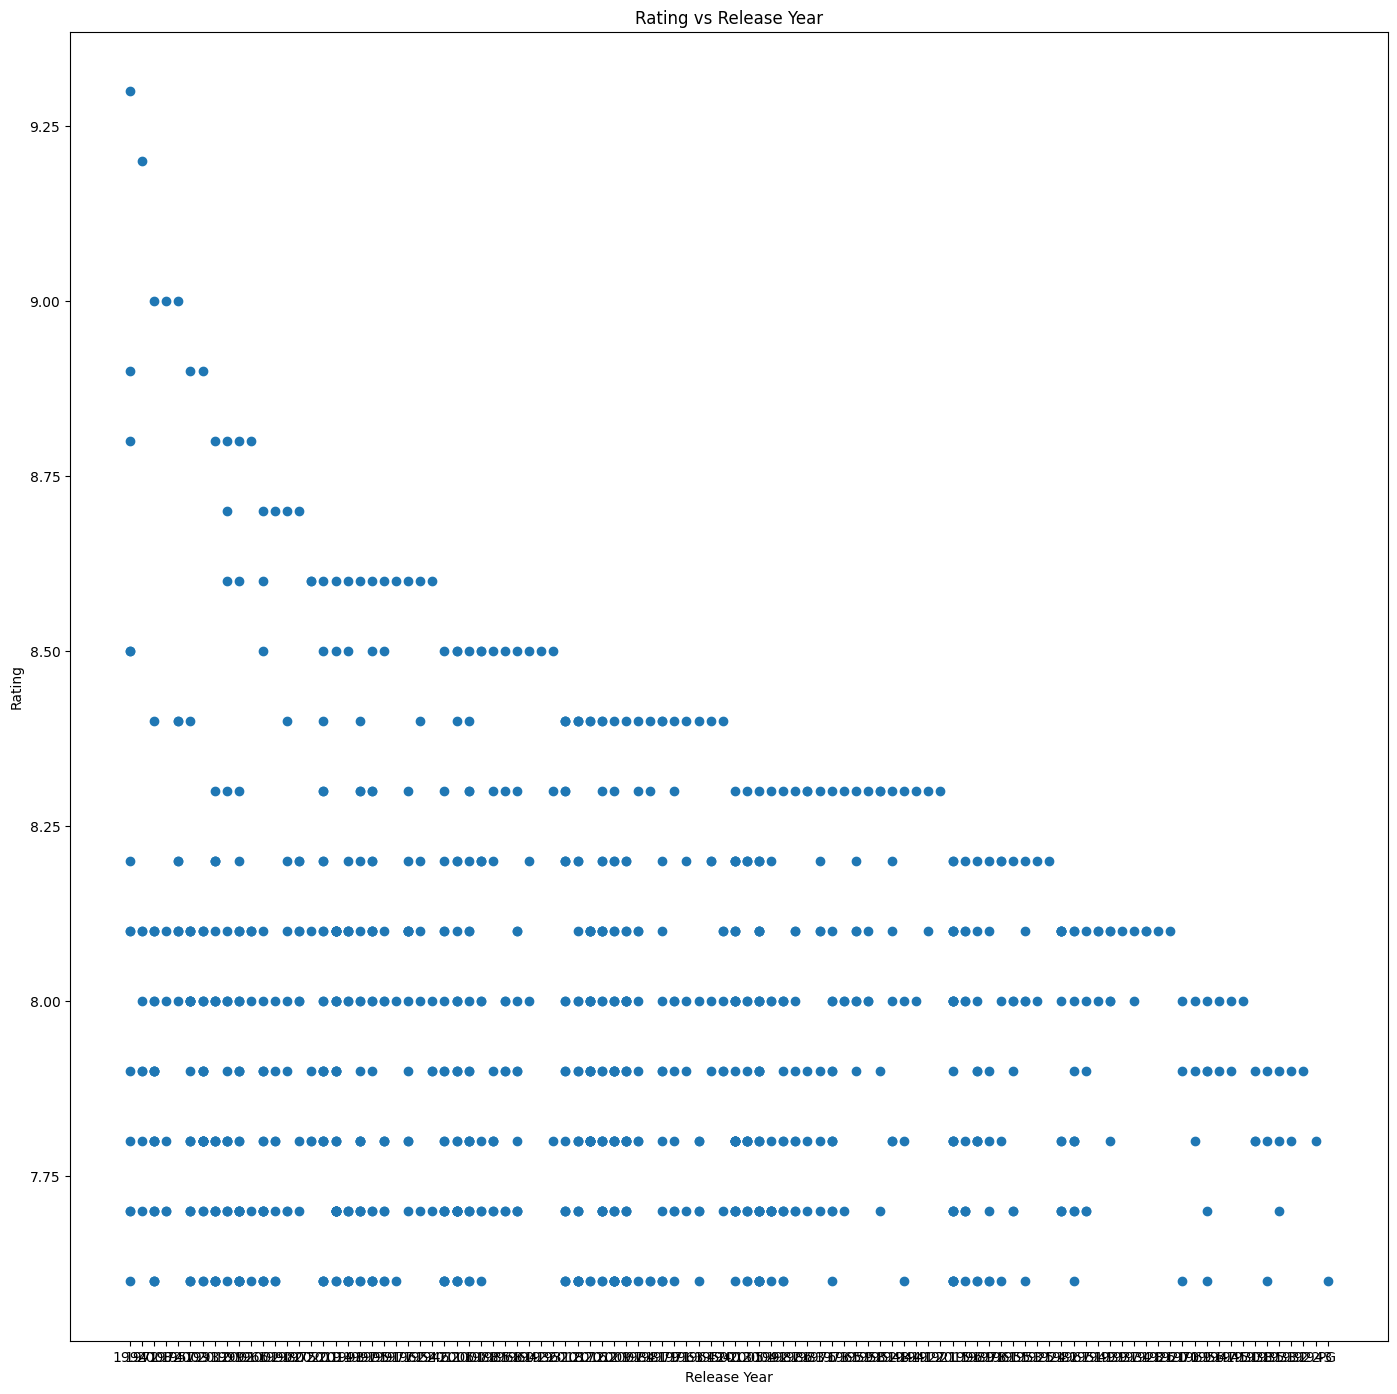

In [15]:
# Q-10. Are there any temporal trends in movie ratings over the years?
plt.figure(figsize = (17,17))
plt.scatter(df['Released_Year'], df['IMDB_Rating'])
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title ('Rating vs Release Year')
plt.show()

In [16]:
# Q-11. Are there any specific directors or actors associated with higher-rated movies?
Top_Directors = df.groupby('Director')['IMDB_Rating'].mean().nlargest(10)
print("Top 10 Directors with Highest Average Rating:\n", Top_Directors)

Top 10 Directors with Highest Average Rating:
 Director
Frank Darabont        8.95
Irvin Kershner        8.70
Lana Wachowski        8.70
Fernando Meirelles    8.60
George Lucas          8.60
Masaki Kobayashi      8.60
Roberto Benigni       8.60
Sudha Kongara         8.60
Thomas Kail           8.60
Milos Forman          8.50
Name: IMDB_Rating, dtype: float64


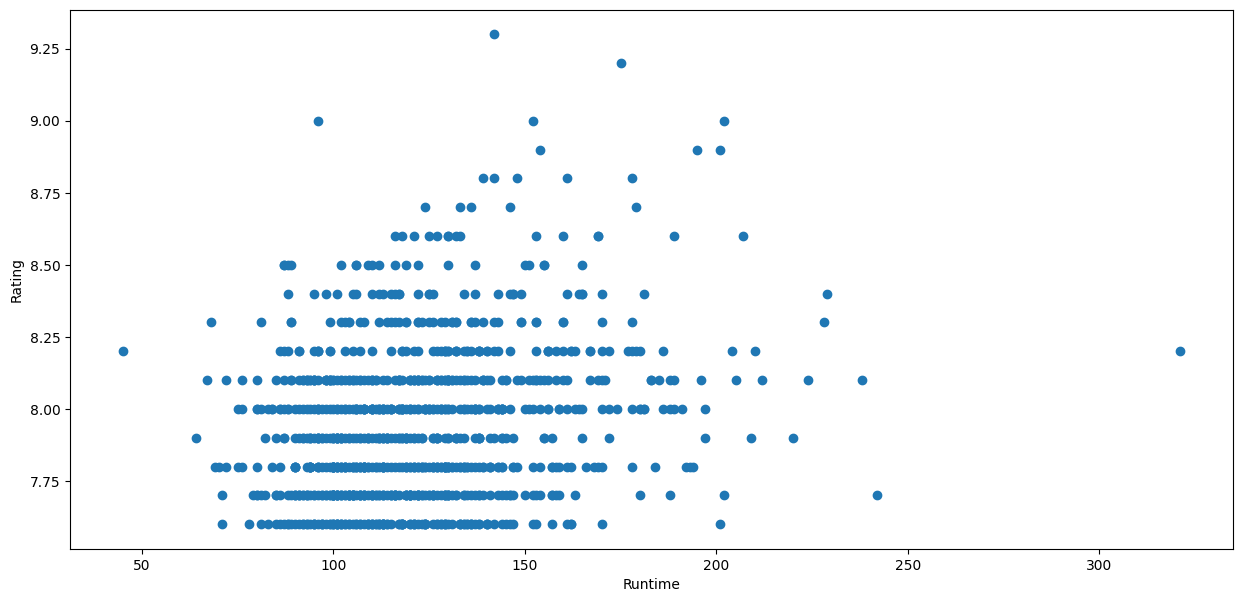

In [17]:
# Q-12. Can we identify any patterns based on movie duration and ratings?
plt.figure(figsize = (15,7))
plt.scatter(df['Runtime'], df['IMDB_Rating'])
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.show()

In [24]:
# Q-13. How do the movie ratings differ across various film certification categories (e.g., G, PG, PG-13, R)?
Average_Rating_by_Certificate = df.groupby('Certificate')['IMDB_Rating'].mean()
print("Average Rating by Certificate:\n", Average_Rating_by_Certificate)

Average Rating by Certificate:
 Certificate
16          8.100000
A           7.998985
Approved    7.945455
G           8.000000
GP          7.850000
PG          7.927027
PG-13       7.797674
Passed      8.020588
R           7.869863
TV-14       8.300000
TV-MA       8.100000
TV-PG       7.900000
U           7.976923
U/A         7.600000
UA          7.957143
Unrated     8.100000
Name: IMDB_Rating, dtype: float64


In [25]:
# Q-14. Are there any specific genres that tend to have longer movie runtimes?
Average_Runbtime_by_Genre = df.groupby('Genre')['Runtime'].mean().sort_values(ascending=False)
print("Average Runtime by Genre:\n", Average_Runbtime_by_Genre)

Average Runtime by Genre:
 Genre
Adventure, Drama, Musical     224.00
Drama, History, Romance       181.50
Drama, Family, Musical        181.00
Adventure, Drama, History     177.25
Biography, Drama, War         172.00
                               ...  
Animation, Crime, Mystery      81.00
Animation, Comedy, Fantasy     81.00
Fantasy, Horror, Mystery       76.00
Animation, Sci-Fi              72.00
Comedy, Musical, War           69.00
Name: Runtime, Length: 202, dtype: float64
